In [14]:
# %matplotlib qt
from plot_iver import prepare_data, plot_inputs_outputs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [15]:
config_file = "iverControlLogs/IverConfigLogs09-15-2022/Config-20220915071519.log"

keys = keys = [
    "control.depthpidd",
    "control.depthpidi",
    "control.depthpidp",
    "control.headingdeadband",
    "control.headingpidd",
    "control.headingpidi",
    "control.headingpidp"
]

def parse_config(config_file: str, keys: List[str]):
    config = {}
    with open(config_file, "r") as f:
        for line in f.readlines():
            for key in keys:
                if key in line:
                    value = float(line[line.find(" = ") + 3:-1])
                    config[key] = value
    return config

In [16]:
def process_run(log_file, config_file):
    try:
        df = prepare_data(log_file)
    except (pd.errors.EmptyDataError, TypeError) as e:
        return
        
    config = parse_config(config_file, keys)
    
    fig, axs = plot_inputs_outputs(df)

    fig.suptitle(f'Depth PID: {config["control.depthpidp"], config["control.depthpidi"], config["control.depthpidd"]}. Heading PID: {config["control.headingpidp"], config["control.headingpidi"], config["control.headingpidd"]}\n{log_file}')
    fig.tight_layout()

    plt.show()

Processing path: iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915071519.log
Processing path: iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915071900.log


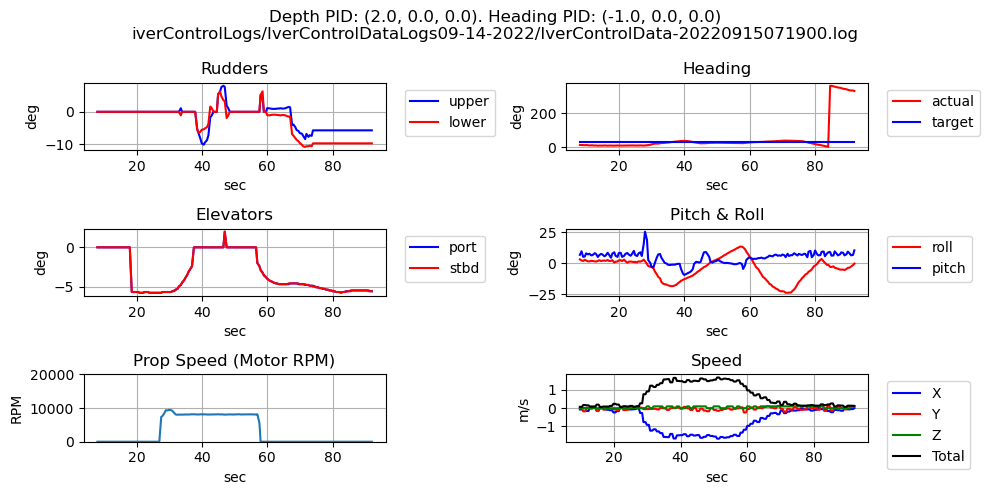

Processing path: iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915072548.log


/Users/timplayer/miniconda3/envs/iver2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/timplayer/miniconda3/envs/iver2/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


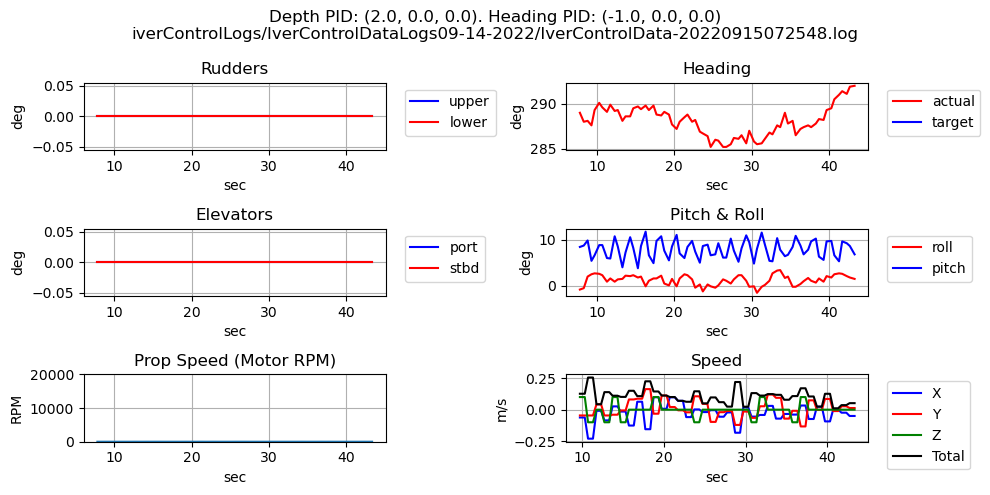

Processing path: iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915080725.log


/Users/timplayer/miniconda3/envs/iver2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/timplayer/miniconda3/envs/iver2/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


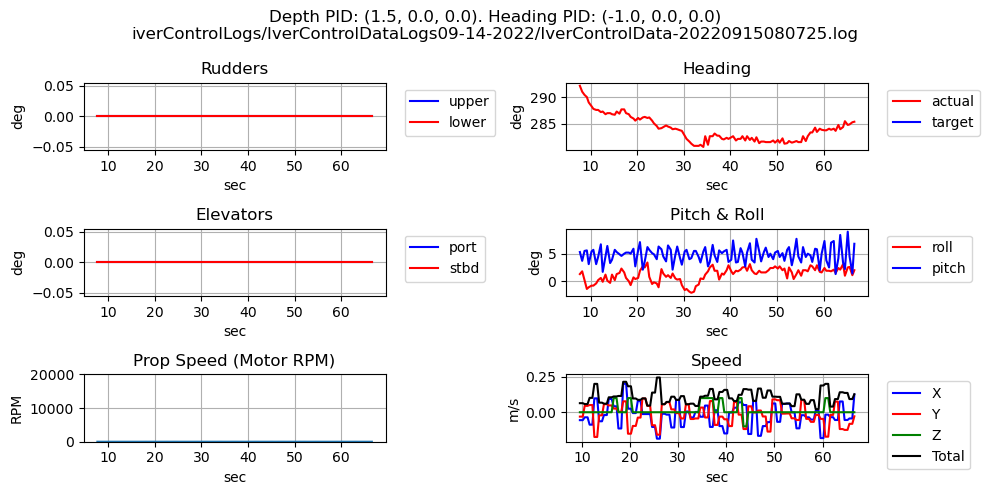

Processing path: iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915073811.log


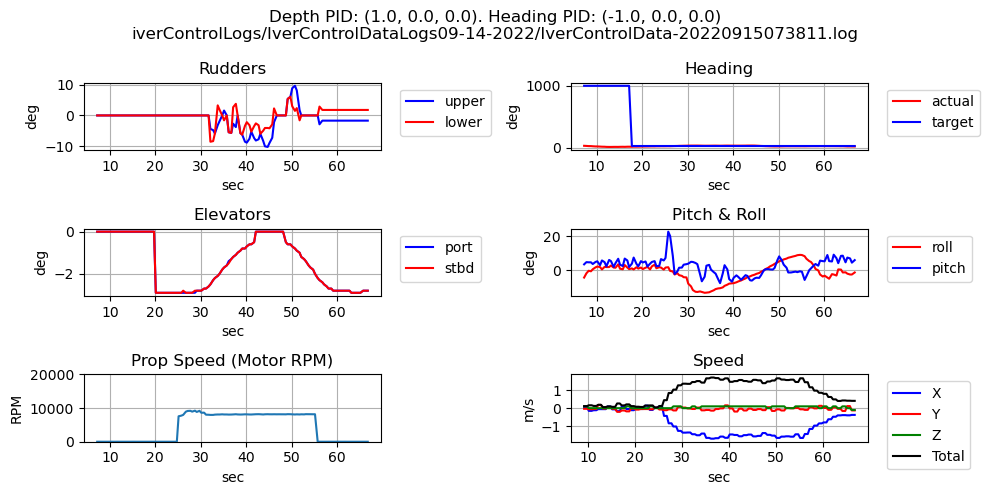

Processing path: iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915072714.log


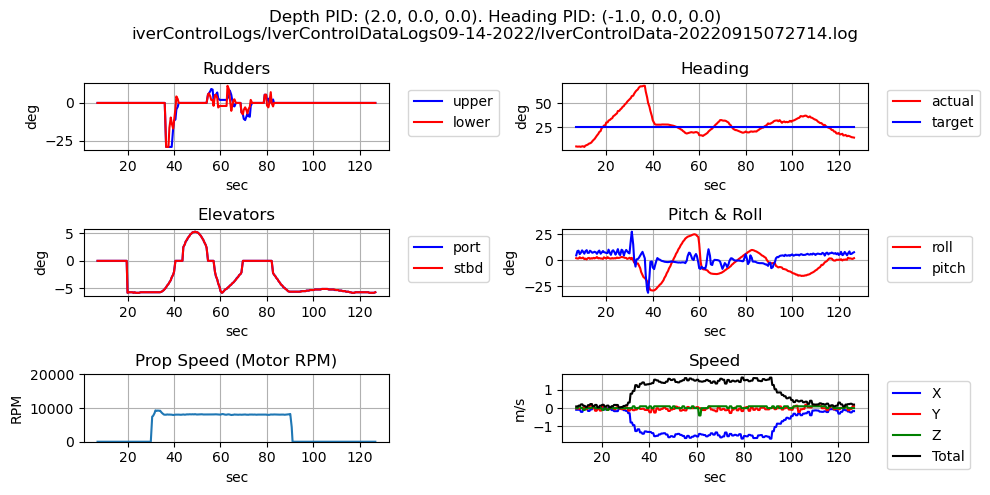

Processing path: iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915075112.log


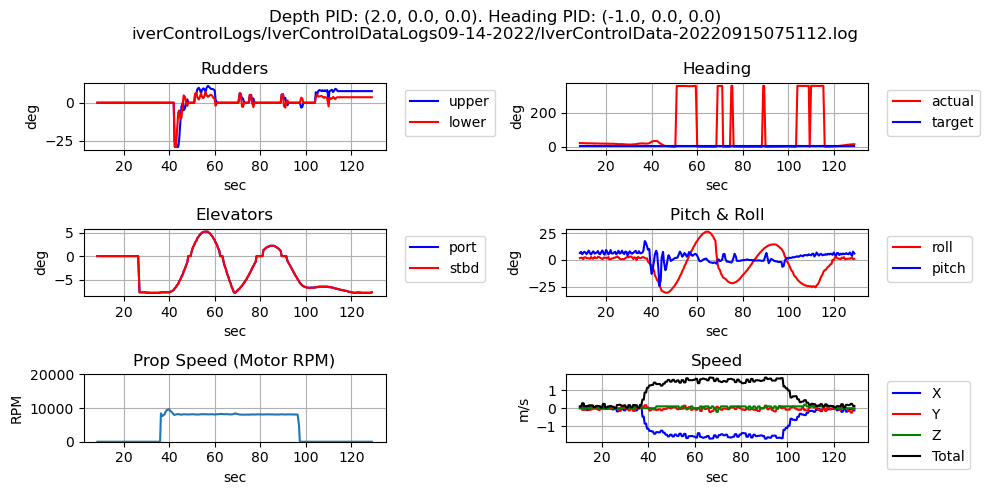

Processing path: iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915073940.log


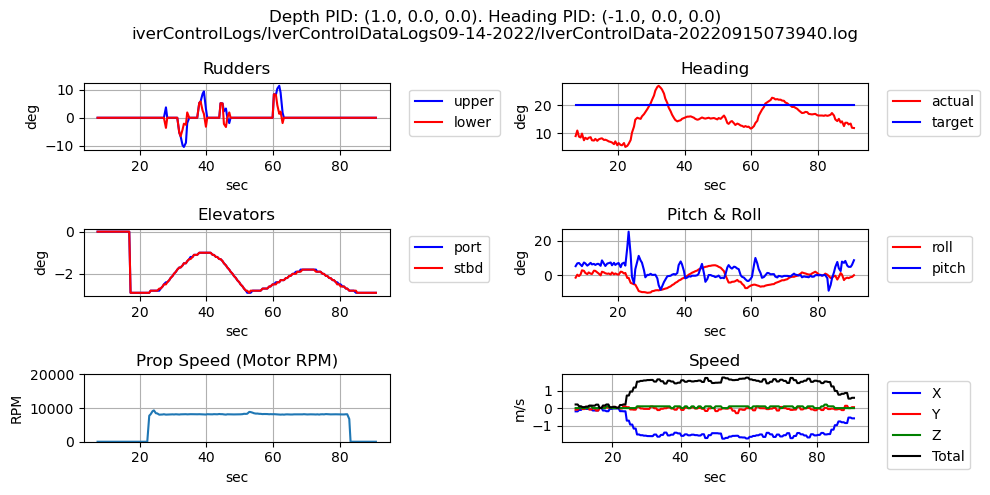

Processing path: iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915071819.log
Processing path: iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915081031.log


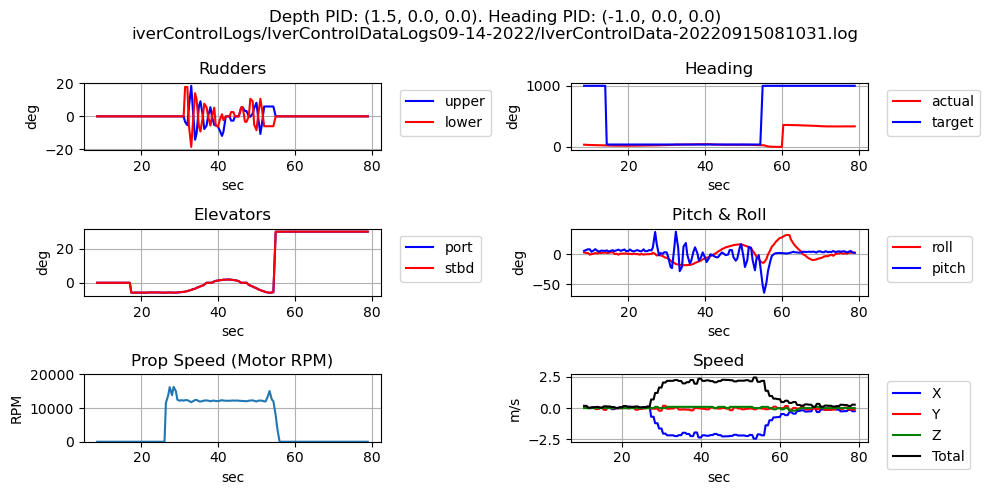

Processing path: iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915073514.log
Processing path: iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915075957.log


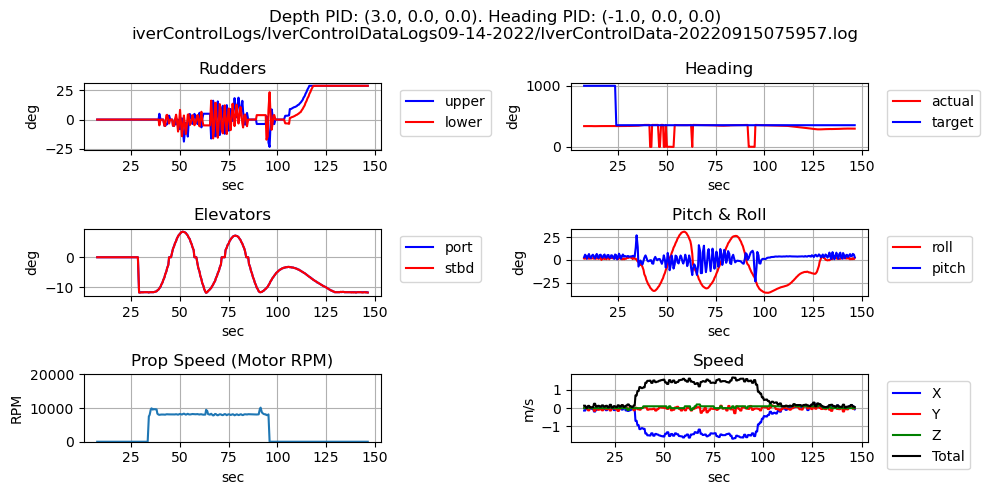

Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913055332.log


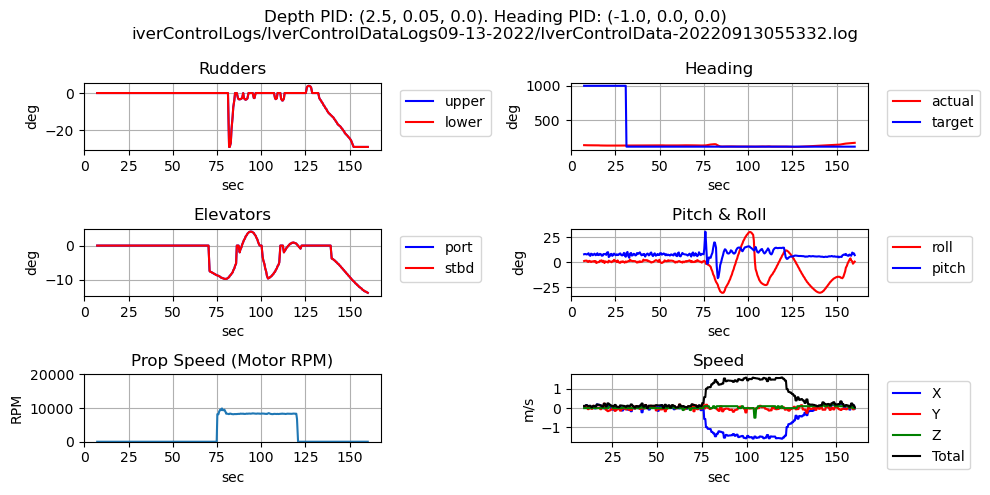

Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913054014.log


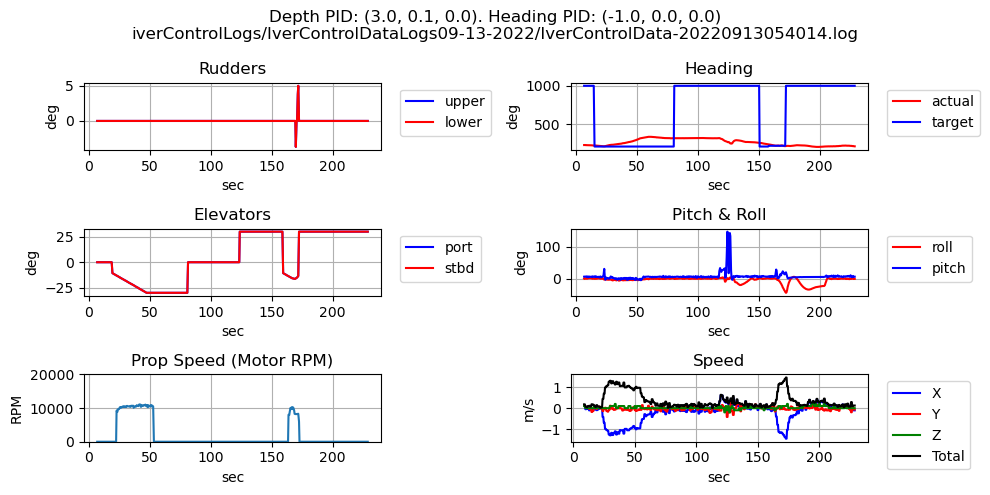

Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913060117.log


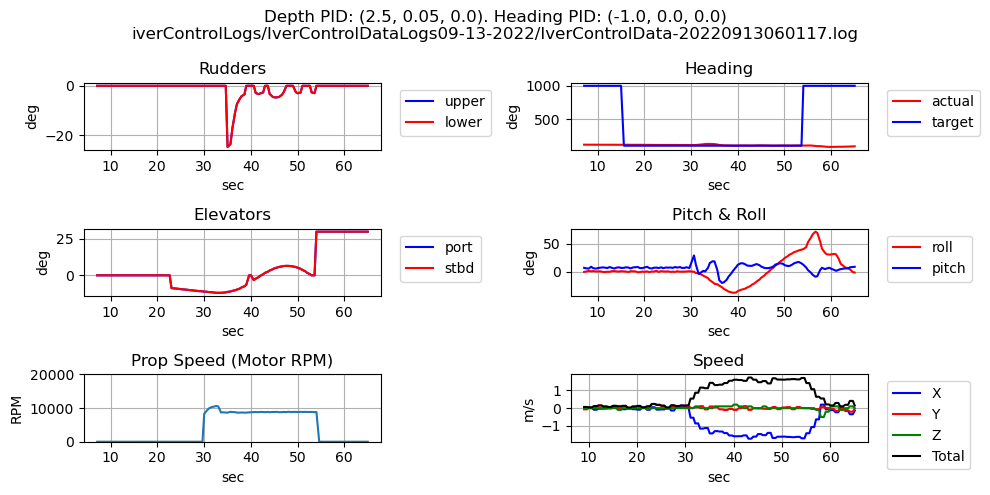

Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913054538.log


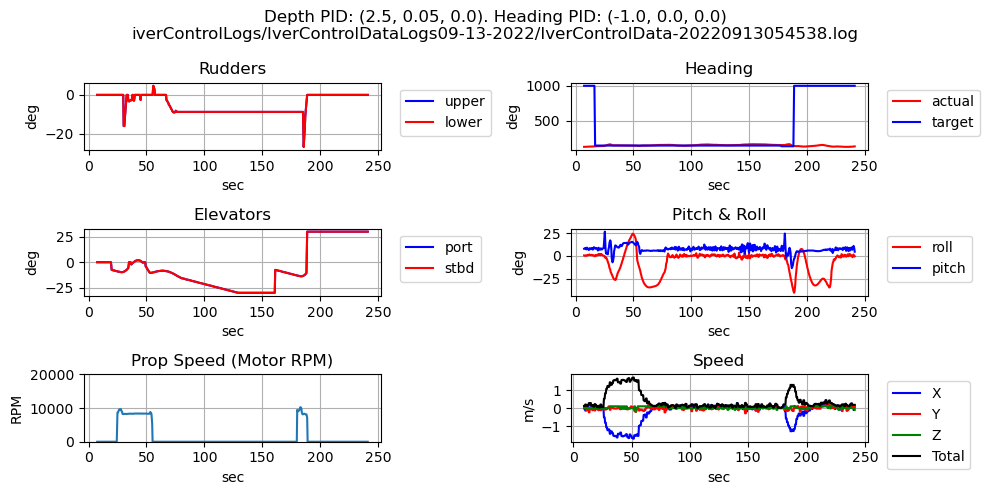

Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913050429.log


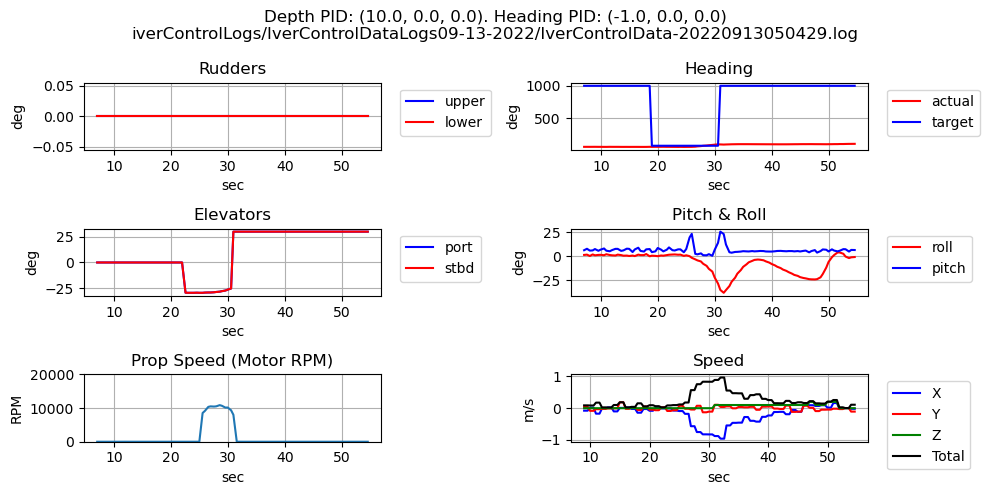

Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913060259.log


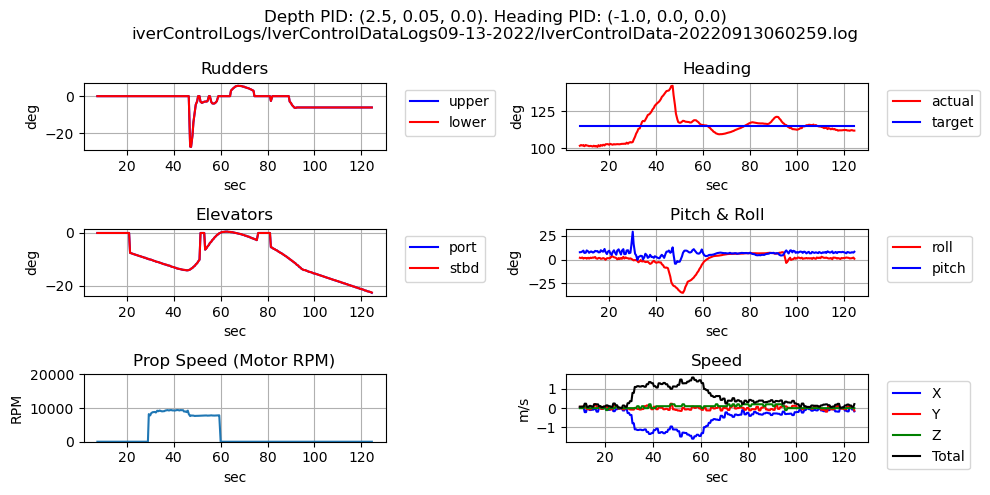

Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913051331.log


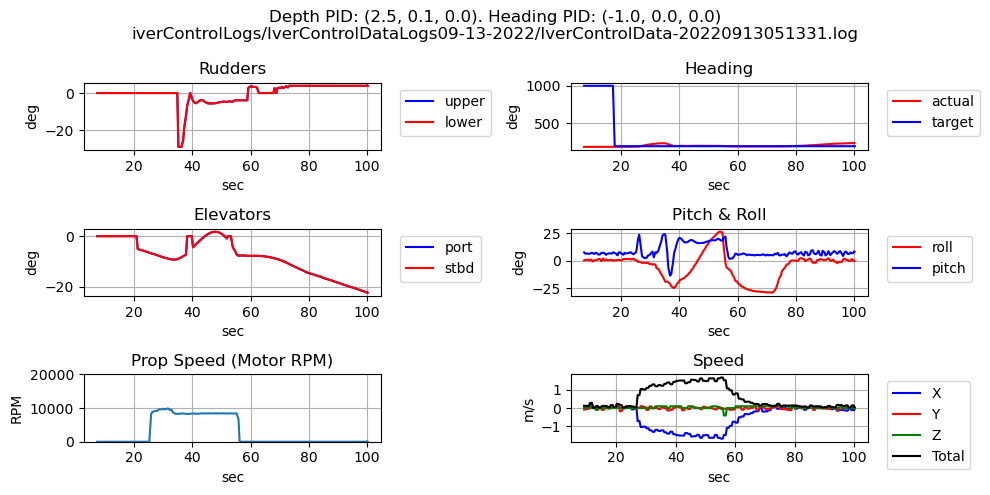

Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913052556.log


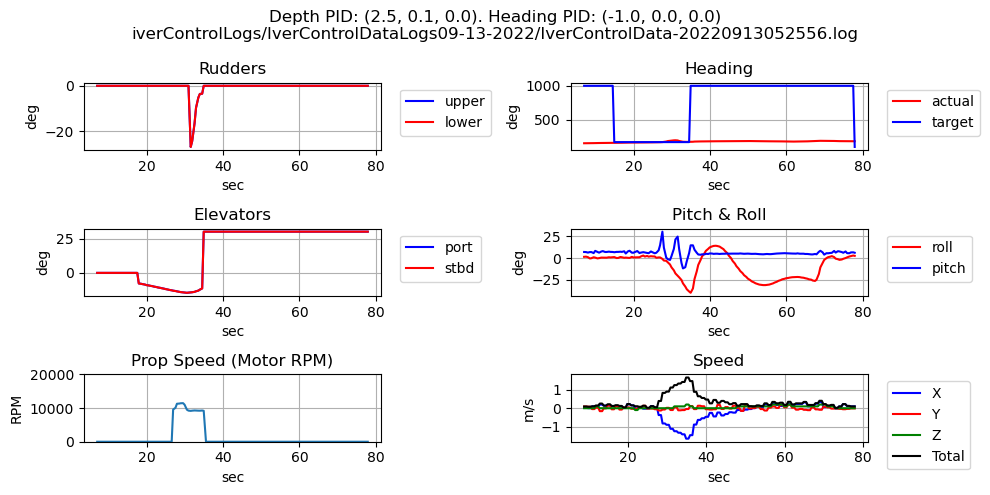

Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913050209.log
Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913045149.log


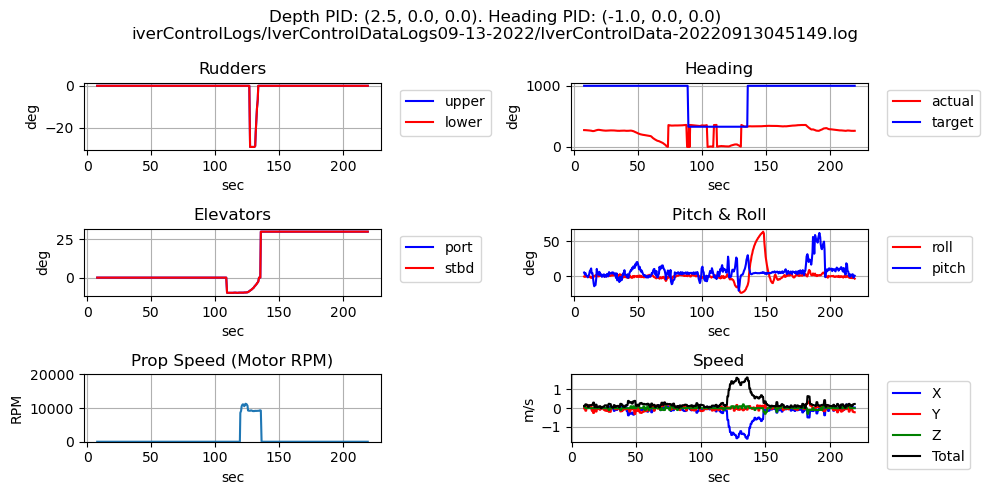

Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913055014.log


/Users/timplayer/miniconda3/envs/iver2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/timplayer/miniconda3/envs/iver2/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


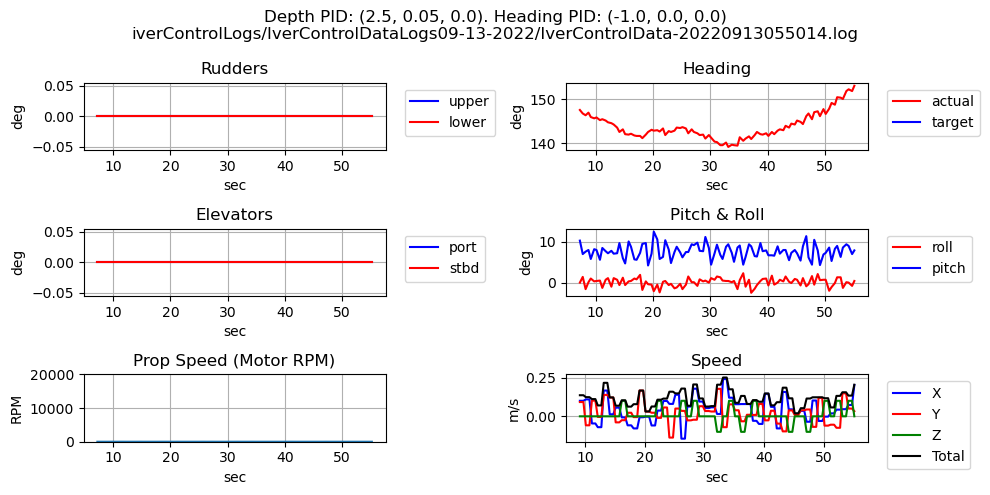

Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913050635.log


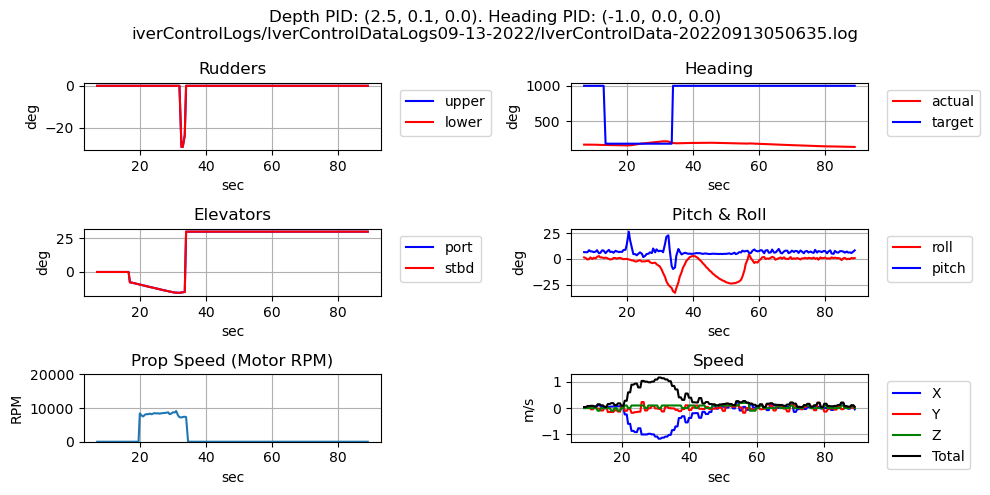

Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913053831.log


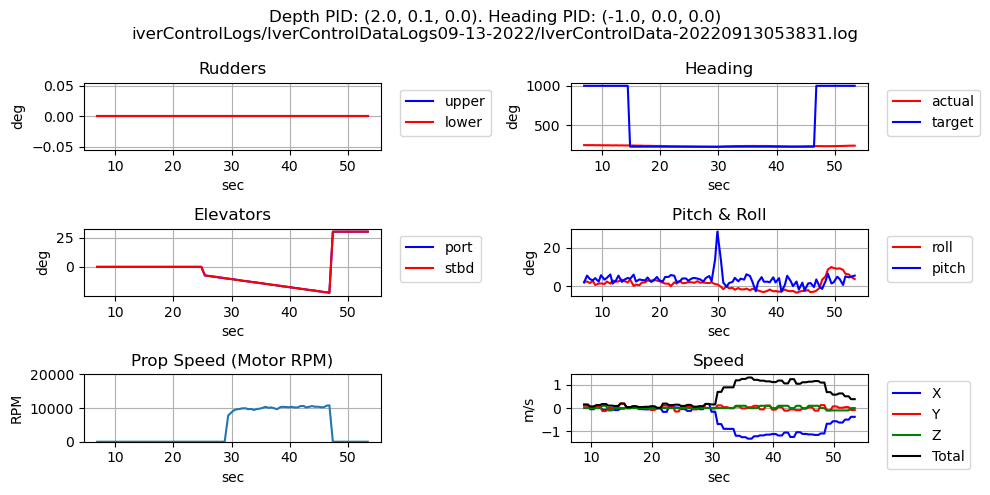

Processing path: iverControlLogs/IverControlDataLogs09-13-2022/IverControlData-20220913052730.log


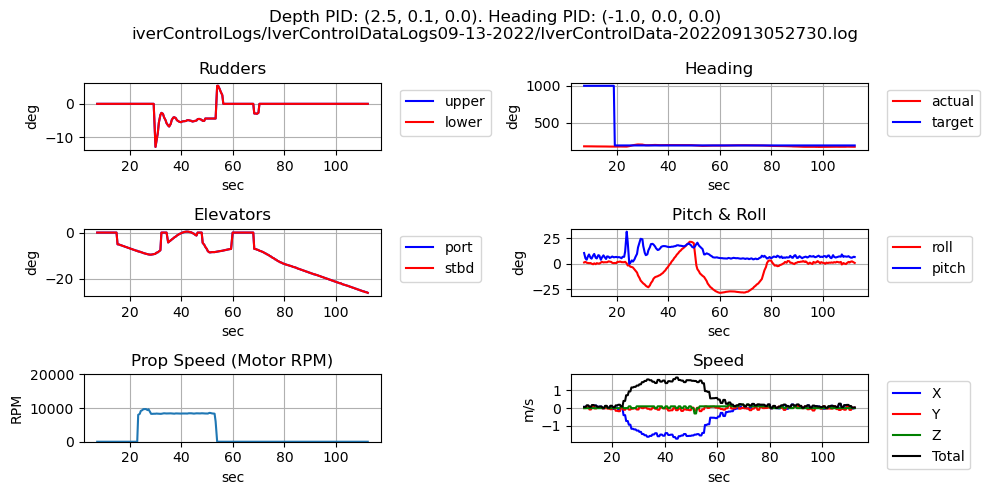

In [17]:
from pathlib import Path
root_directory = Path(".")
for path_object in root_directory.glob('**/*IverControlData*.log'):
    print(f"Processing path: {path_object}")

    # Extract timestamp
    s = path_object.name
    timestamp = s[s.find("2022"):s.find(".log")]

    # Find corresponding config
    config_file = next(root_directory.glob(f'**/*Config-{timestamp}.log*')).absolute()
    process_run(log_file=path_object, config_file=config_file)

In [18]:
log_file = "iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915080725.log"
log_file = "iverControlLogs/IverControlDataLogs09-14-2022/IverControlData-20220915081031.log"

df = prepare_data(log_file)

(<Figure size 1000x500 with 6 Axes>,
 array([[<AxesSubplot:title={'center':'Rudders'}, xlabel='sec', ylabel='deg'>,
         <AxesSubplot:title={'center':'Heading'}, xlabel='sec', ylabel='deg'>],
        [<AxesSubplot:title={'center':'Elevators'}, xlabel='sec', ylabel='deg'>,
         <AxesSubplot:title={'center':'Pitch & Roll'}, xlabel='sec', ylabel='deg'>],
        [<AxesSubplot:title={'center':'Prop Speed (Motor RPM)'}, xlabel='sec', ylabel='RPM'>,
         <AxesSubplot:title={'center':'Speed'}, xlabel='sec', ylabel='m/s'>]],
       dtype=object))

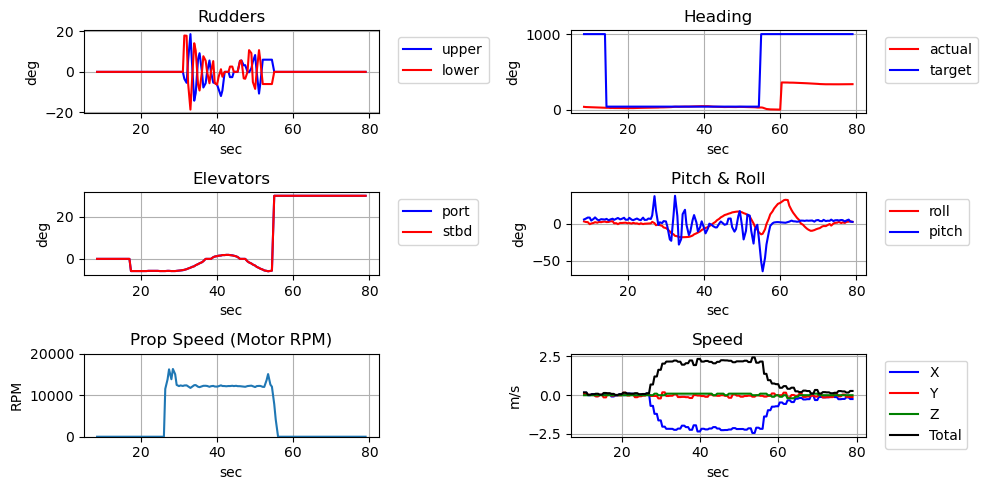

In [19]:
plot_inputs_outputs(df)